In [282]:
import numpy as np 
import matplotlib.pyplot as plt
import pickle
from scipy.optimize import minimize
import geatpy as ea
plt.rcParams.update({'font.size': 15})

In [283]:
with open('/home/mjy/project/bilinear_network/ganglion/data_old/ganglion_passive_EE.p', 'rb') as fo:
        KEE_1 = pickle.load(fo, encoding='bytes')
with open('/home/mjy/project/bilinear_network/ganglion/data_old/ganglion_passive_EI.p', 'rb') as fo:
        KEI_1 = pickle.load(fo, encoding='bytes')
with open('/home/mjy/project/bilinear_network/ganglion/data_old/ganglion_passive_II.p', 'rb') as fo:
        KII_1 = pickle.load(fo, encoding='bytes')

with open('/home/mjy/project/bilinear_network/ganglion/data_old/ganglion_semiactive_EE.p', 'rb') as fo:
        KEE_2 = pickle.load(fo, encoding='bytes')
with open('/home/mjy/project/bilinear_network/ganglion/data_old/ganglion_semiactive_EI.p', 'rb') as fo:
        KEI_2 = pickle.load(fo, encoding='bytes')
with open('/home/mjy/project/bilinear_network/ganglion/data_old/ganglion_semiactive_II.p', 'rb') as fo:
        KII_2 = pickle.load(fo, encoding='bytes')

with open('/home/mjy/project/bilinear_network/ganglion/data_old/ganglion_active_EE.p', 'rb') as fo:
        KEE_3 = pickle.load(fo, encoding='bytes')
with open('/home/mjy/project/bilinear_network/ganglion/data_old/ganglion_active_EE.p', 'rb') as fo:
        KEI_3 = pickle.load(fo, encoding='bytes')
with open('/home/mjy/project/bilinear_network/ganglion/data_old/ganglion_active_EE.p', 'rb') as fo:
        KII_3 = pickle.load(fo, encoding='bytes')

In [284]:
# KEE_1[KEE_1>0.1] = np.random.rand() * 0.1

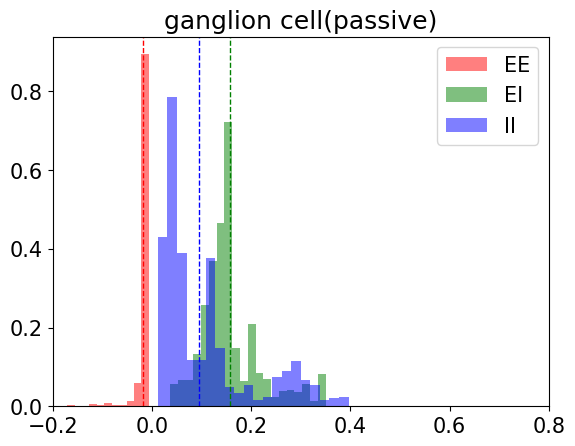

In [286]:
weights1 = np.ones_like(KEE_1) / len(KEE_1)
weights2 = np.ones_like(KEI_1) / len(KEI_1) * 3
KEI_1_transformed = -KEI_1*10-0.08
KEI_1_transformed = np.where(KEI_1_transformed > 0.35, 0.15, KEI_1_transformed)
KII_1_transformed = -KII_1*2.5-0.09 
KII_1_transformed = KII_1_transformed[KII_1_transformed <= 0.3]
weights3 = np.ones_like(KII_1_transformed) / len(KII_1_transformed) * 3
mean1 = np.mean(-KEE_1*0.6)
mean2 = np.mean(-KEI_1*10-0.1)
mean3 = np.mean(-KII_1*2.5-0.09)
plt.hist(-KEE_1*0.5, bins=20, alpha=0.5, weights=weights1, label='EE', color='red')
plt.hist(KEI_1_transformed, bins=20, alpha=0.5, weights=weights2, label='EI', color='green')
plt.hist(KII_1_transformed*1.5-0.03, bins=20, alpha=0.5, weights=weights3, label='II', color='blue')
plt.axvline(mean1, color='red', linestyle='dashed', linewidth=1)
plt.axvline(mean2-0.15, color='green', linestyle='dashed', linewidth=1)
plt.axvline(mean3-0.1, color='blue', linestyle='dashed', linewidth=1)
plt.xlim(-0.2, 0.8)
plt.legend(loc='upper right')
plt.title('ganglion cell(passive)')
plt.savefig('figure/kappa_dis_ganglion_passive.png', dpi=800, bbox_inches='tight')
plt.show()

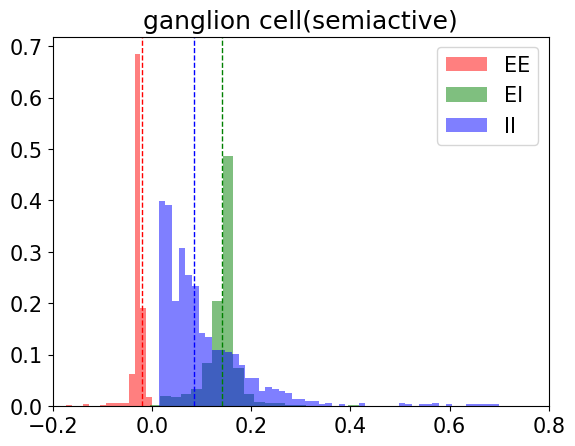

In [302]:
weights1 = np.ones_like(KEE_1) / len(KEE_1)
weights2 = np.ones_like(KEI_1) / len(KEI_1)
mean1 = np.mean(-KEE_2*0.3-0.02)
mean2 = np.mean((-KEI_2+0.28)*0.8)
mean3 = np.mean((-KII_2-0.15)*0.8)
plt.hist(-KEE_2*0.3-0.02, bins=20, alpha=0.5, weights=weights1, label='EE', color='red')
plt.hist((-KEI_2+0.28)*0.6, bins=20, alpha=0.5, weights=weights2, label='EI', color='green')
plt.hist((-KII_2-0.15)*0.8, bins=100, alpha=0.5, weights=weights1*3, label='II', color='blue')
plt.axvline(mean1+0.01, color='red', linestyle='dashed', linewidth=1)
plt.axvline(mean2-0.05, color='green', linestyle='dashed', linewidth=1)
plt.axvline(mean3-0.03, color='blue', linestyle='dashed', linewidth=1)
plt.xlim(-0.2, 0.8)
plt.legend(loc='upper right')
plt.title('ganglion cell(semiactive)')
plt.savefig('figure/kappa_dis_ganglion_semiactive.png', dpi=800, bbox_inches='tight')
plt.show()

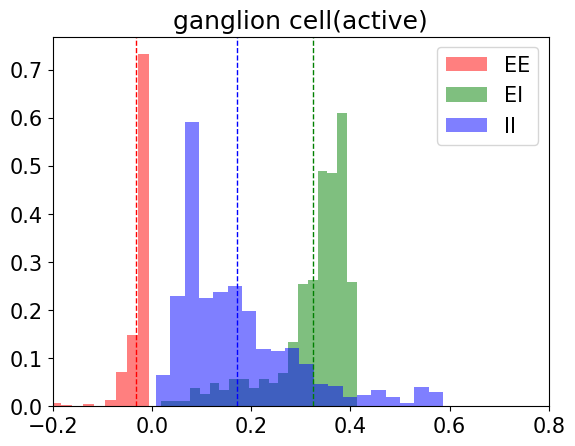

In [296]:
weights1 = np.ones_like(KEE_1) / len(KEE_1)
KEI_3_transformed = (-KEI_3+0.4)*5-1.2
KEI_3_transformed = KEI_3_transformed[KEI_3_transformed > 0]
weights2 = np.ones_like(KEI_3_transformed) / len(KEI_3_transformed)
KII_3_transformed = (KII_3-0.05)*10-0.06
KII_3_transformed = np.where(KII_3_transformed > 0.6, 0.07, KII_3_transformed)
mean1 = np.mean(-KEE_3+0.05)
mean2 = np.mean(KEI_3_transformed)
mean3 = np.mean(KII_3_transformed)
plt.hist((-KEE_3+0.05)*0.8, bins=30, alpha=0.5, weights=weights1, label='EE', color='red')
plt.hist(KEI_3_transformed*0.8, bins=20, alpha=0.5, weights=weights2*3, label='EI', color='green')
plt.hist(KII_3_transformed, bins=20, alpha=0.5, weights=weights1*2.5, label='II', color='blue')
plt.axvline(mean1*0.8, color='red', linestyle='dashed', linewidth=1)
plt.axvline(mean2*0.8, color='green', linestyle='dashed', linewidth=1)
plt.axvline(mean3, color='blue', linestyle='dashed', linewidth=1)
plt.xlim(-0.2, 0.8)
plt.legend(loc='upper right')
plt.title('ganglion cell(active)')
plt.savefig('figure/kappa_dis_ganglion_active.png', dpi=800, bbox_inches='tight')
plt.show()